### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

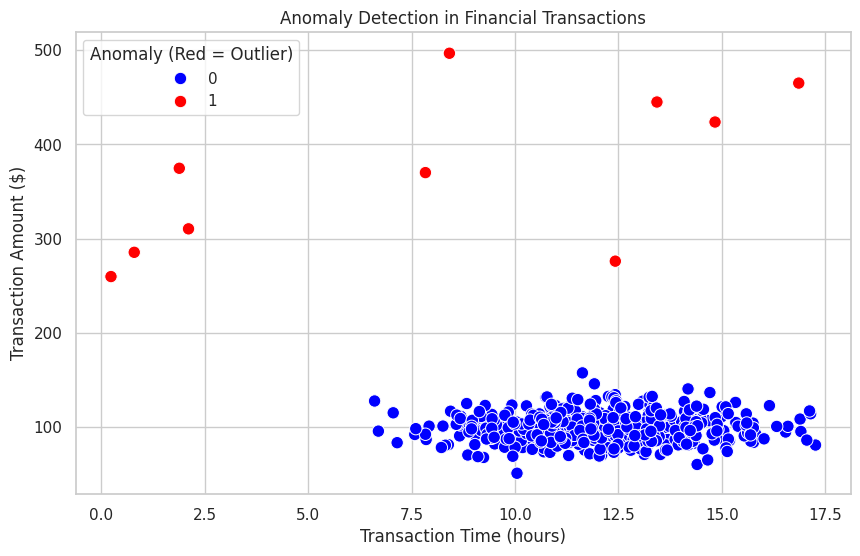

✅ Results saved to 'detected_anomalies.csv'
✅ All tests passed.


In [17]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Optional: Better plot style
sns.set(style="whitegrid")

# Step 2: Configuration dictionary
CONFIG = {
    "contamination": 0.02,
    "output_file": "detected_anomalies.csv",
    "random_state": 42
}

# Step 3: Generate Synthetic Financial Transaction Data
def generate_transaction_data():
    np.random.seed(CONFIG["random_state"])

    # Generate normal transactions
    normal_amounts = np.random.normal(loc=100, scale=15, size=490)
    normal_times = np.random.normal(loc=12, scale=2, size=490)  # hours of day

    # Generate anomalies
    anomaly_amounts = np.random.uniform(low=250, high=500, size=10)
    anomaly_times = np.random.uniform(low=0, high=24, size=10)

    # Combine data
    all_amounts = np.concatenate([normal_amounts, anomaly_amounts])
    all_times = np.concatenate([normal_times, anomaly_times])

    df = pd.DataFrame({
        'TransactionAmount': all_amounts,
        'TransactionTime': all_times
    })

    # Validate data
    if df.isnull().any().any():
        raise ValueError("Generated data contains NaNs.")

    return df

# Step 4: Apply Isolation Forest to detect anomalies
def detect_anomalies(df):
    try:
        model = IsolationForest(contamination=CONFIG["contamination"], random_state=CONFIG["random_state"])
        df['Anomaly'] = model.fit_predict(df[['TransactionAmount', 'TransactionTime']])
        df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  # 0 = normal, 1 = anomaly
        return df
    except Exception as e:
        print(f"❌ Error during model fitting: {e}")
        return df

# Step 5: Visualize the anomalies
def plot_anomalies(df):
    try:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            x='TransactionTime',
            y='TransactionAmount',
            hue='Anomaly',
            data=df,
            palette={0: 'blue', 1: 'red'},
            s=80
        )
        plt.title("Anomaly Detection in Financial Transactions")
        plt.xlabel("Transaction Time (hours)")
        plt.ylabel("Transaction Amount ($)")
        plt.legend(title="Anomaly (Red = Outlier)")
        plt.show()
    except Exception as e:
        print(f"❌ Error during plotting: {e}")

# Step 6: Save results to CSV
def save_results(df, filename):
    try:
        df.to_csv(filename, index=False)
        print(f"✅ Results saved to '{filename}'")
    except Exception as e:
        print(f"❌ Error saving file: {e}")

# Step 7: Unit Tests to Validate Logic
def test_generate_transaction_data():
    df = generate_transaction_data()
    assert not df.empty, "DataFrame is empty."
    assert df.isnull().sum().sum() == 0, "Data contains NaNs."
    assert 'TransactionAmount' in df.columns, "Missing 'TransactionAmount' column."
    assert df['TransactionAmount'].dtype in ['float64', 'int64'], "TransactionAmount must be numeric."

def test_anomaly_detection():
    df = generate_transaction_data()
    df = detect_anomalies(df)
    anomalies = df['Anomaly'].sum()
    assert anomalies > 0, "No anomalies detected. Check contamination parameter."
    assert 'Anomaly' in df.columns, "'Anomaly' column not found."

# Step 8: Main Function
def main():
    df = generate_transaction_data()
    df = detect_anomalies(df)
    plot_anomalies(df)
    save_results(df, CONFIG["output_file"])

    # Run tests
    test_generate_transaction_data()
    test_anomaly_detection()
    print("✅ All tests passed.")

# Execute
main()


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [18]:
# write your code from here

### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [19]:
# write your code from here

### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

In [20]:
# write your code from here

### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

In [21]:
# write your code from here